In [ ]:
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null
# 런타임 다시시작

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [ ]:
#그래프에서 마이너스 기호가 표시되게 하는 설정입니다.
plt.rc('font', family='NanumBarunGothic')
matplotlib.rcParams['axes.unicode_minus'] = False

In [ ]:
from google.colab import drive
drive.mount('/content/mnt')

Mounted at /content/mnt


In [ ]:
filepath = '/content/mnt/MyDrive/proj1_1조/data/'

In [ ]:
# 학습 데이터 read
train = pd.read_csv(filepath + 'train.csv')
test = pd.read_csv(filepath + 'test.csv')

In [ ]:
train = train.drop(['조식메뉴', '중식메뉴', '석식메뉴'], axis=1)
test = test.drop(['조식메뉴', '중식메뉴', '석식메뉴'], axis=1)

In [ ]:
# 인원수만 따로 있는 csv 파일 제작
train.to_csv(filepath+'train_메뉴제거.csv', index=False)
test.to_csv(filepath+'test_메뉴제거.csv', index=False)

In [ ]:
# 날씨 데이터 read
lunch = pd.read_csv(filepath + 'lunch.csv')
dinner = pd.read_csv(filepath + 'dinner.csv')

In [ ]:
train.loc[train['일자'] == '2018-06-01', ('요일')] = '금'

In [ ]:
train.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,867.0,560.0
2,2016-02-03,수,2601,56,180,111,0.0,1017.0,573.0
3,2016-02-04,목,2601,104,220,355,0.0,978.0,525.0
4,2016-02-05,금,2601,278,181,34,0.0,925.0,330.0


In [ ]:
lunch.head()

,일자,우산,쾌적,불쾌,저온,중온,고온
0,2016-02-01,0,1,0,0,1,0
1,2016-02-02,0,1,0,0,1,0
2,2016-02-03,0,1,0,0,1,0
3,2016-02-04,0,1,0,0,1,0
4,2016-02-05,0,1,0,0,1,0


# 휴일전날 추가

In [ ]:
train['휴일전날'] = False

In [ ]:
before_holiday = [
    '2016-02-05', '2016-02-29', '2016-04-12', '2016-05-04',
    '2016-06-03', '2016-08-12', '2016-09-13', '2016-09-30',
    '2017-01-26', '2017-01-27', '2017-02-28', '2017-04-28',
    '2017-05-02', '2017-05-04', '2017-05-08', '2017-06-05',
    '2017-08-14', '2017-10-06', '2017-12-22', '2018-12-29',
    '2018-02-14', '2018-02-28', '2018-04-30', '2018-05-04',
    '2018-05-21', '2018-06-05', '2018-06-12', '2018-08-14',
    '2018-10-08', '2018-12-24', '2019-12-31', '2019-02-01',
    '2019-02-28', '2019-04-30', '2019-05-03', '2019-06-05',
    '2019-08-14', '2019-09-11', '2019-09-30', '2019-10-02',
    '2019-10-08', '2019-12-24', '2019-12-31', '2020-01-23',
    '2020-01-24', '2020-04-24', '2020-04-29', '2020-05-04',
    '2020-06-12', '2020-08-14', '2020-09-28', '2020-10-08',
    '2020-12-24'
]
for i in before_holiday:
    train.loc[train['일자'] == i, ('휴일전날')] = True

In [ ]:
train.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계,휴일전날
0,2016-02-01,월,2601,50,150,238,0.0,1039.0,331.0,False
1,2016-02-02,화,2601,50,173,319,0.0,867.0,560.0,False
2,2016-02-03,수,2601,56,180,111,0.0,1017.0,573.0,False
3,2016-02-04,목,2601,104,220,355,0.0,978.0,525.0,False
4,2016-02-05,금,2601,278,181,34,0.0,925.0,330.0,True


In [ ]:
# 식사 가능자수
train['식사가능자수'] = train['본사정원수'] - train['본사휴가자수'] - train['현본사소속재택근무자수'] - train['본사출장자수']
test['식사가능자수'] = test['본사정원수'] - test['본사휴가자수'] - test['현본사소속재택근무자수'] - test['본사출장자수']

In [ ]:
# 식사 참여율
train['중식참여율'] = train['중식계'] / train['식사가능자수']
train['석식참여율'] = train['석식계'] / train['식사가능자수']

In [ ]:
train.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계,휴일전날,식사가능자수,중식참여율,석식참여율
0,2016-02-01,월,2601,50,150,238,0.0,1039.0,331.0,False,2401.0,0.432736,0.137859
1,2016-02-02,화,2601,50,173,319,0.0,867.0,560.0,False,2378.0,0.364592,0.235492
2,2016-02-03,수,2601,56,180,111,0.0,1017.0,573.0,False,2365.0,0.430021,0.242283
3,2016-02-04,목,2601,104,220,355,0.0,978.0,525.0,False,2277.0,0.429513,0.230567
4,2016-02-05,금,2601,278,181,34,0.0,925.0,330.0,True,2142.0,0.431839,0.154062


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   일자              1205 non-null   object 
 1   요일              1205 non-null   object 
 2   본사정원수           1205 non-null   int64  
 3   본사휴가자수          1205 non-null   int64  
 4   본사출장자수          1205 non-null   int64  
 5   본사시간외근무명령서승인건수  1205 non-null   int64  
 6   현본사소속재택근무자수     1205 non-null   float64
 7   중식계             1205 non-null   float64
 8   석식계             1205 non-null   float64
 9   휴일전날            1205 non-null   bool   
 10  식사가능자수          1205 non-null   float64
 11  중식참여율           1205 non-null   float64
 12  석식참여율           1205 non-null   float64
dtypes: bool(1), float64(6), int64(4), object(2)
memory usage: 114.3+ KB


In [ ]:
lunch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   일자      1894 non-null   object
 1   우산      1894 non-null   int64 
 2   쾌적      1894 non-null   int64 
 3   불쾌      1894 non-null   int64 
 4   저온      1894 non-null   int64 
 5   중온      1894 non-null   int64 
 6   고온      1894 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 103.7+ KB


In [ ]:
train_l = train.drop(['석식계', '석식참여율'], axis=1)
train_d = train.drop(['중식계', '중식참여율'], axis=1)

In [ ]:
train_lunch = pd.merge(train_l, lunch, how='inner')
train_dinner = pd.merge(train_d, dinner, how='inner')

In [ ]:
train_lunch.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,휴일전날,식사가능자수,중식참여율,우산,쾌적,불쾌,저온,중온,고온
0,2016-02-01,월,2601,50,150,238,0.0,1039.0,False,2401.0,0.432736,0,1,0,0,1,0
1,2016-02-02,화,2601,50,173,319,0.0,867.0,False,2378.0,0.364592,0,1,0,0,1,0
2,2016-02-03,수,2601,56,180,111,0.0,1017.0,False,2365.0,0.430021,0,1,0,0,1,0
3,2016-02-04,목,2601,104,220,355,0.0,978.0,False,2277.0,0.429513,0,1,0,0,1,0
4,2016-02-05,금,2601,278,181,34,0.0,925.0,True,2142.0,0.431839,0,1,0,0,1,0


In [ ]:
train_dinner.tail()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,석식계,휴일전날,식사가능자수,석식참여율,우산,쾌적,불쾌,저온,중온,고온
1200,2021-01-20,수,2983,75,198,4,391.0,421.0,False,2319.0,0.181544,0,1,0,0,1,0
1201,2021-01-21,목,2983,92,231,462,351.0,353.0,False,2309.0,0.152880,0,1,0,0,1,0
1202,2021-01-22,금,2983,255,248,1,303.0,217.0,False,2177.0,0.099678,0,1,0,0,1,0
1203,2021-01-25,월,2983,107,153,616,327.0,502.0,False,2396.0,0.209516,0,1,0,0,1,0
1204,2021-01-26,화,2983,69,183,551,362.0,480.0,False,2369.0,0.202617,1,1,0,0,1,0


In [ ]:
tl = train_lunch.drop(['본사휴가자수', '본사출장자수', '현본사소속재택근무자수', '본사시간외근무명령서승인건수'], axis=1)
td = train_dinner.drop(['본사휴가자수', '본사출장자수', '현본사소속재택근무자수', '본사시간외근무명령서승인건수'], axis=1)

In [ ]:
# # 저장..
# train_lunch.to_csv(filepath+'train_lunch.csv', index=False)
# train_dinner.to_csv(filepath+'train_dinner.csv', index=False)

In [ ]:
tl.to_csv(filepath+'/기상청/tl.csv', index=False)
td.to_csv(filepath+'/기상청/td.csv', index=False)

In [ ]:
tl.describe()

,본사정원수,중식계,식사가능자수,중식참여율,우산,쾌적,불쾌,저온,중온,고온
count,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000
mean,2807.815768,890.334440,2365.253112,0.376458,0.103734,0.817427,0.182573,0.015768,0.487137,0.496266
std,171.264404,209.505057,176.563062,0.085110,0.305042,0.386476,0.386476,0.124627,0.500042,0.500194
min,2601.000000,296.000000,1372.000000,0.143649,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2645.000000,758.000000,2281.000000,0.317741,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,2760.000000,879.000000,2357.000000,0.371933,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,2962.000000,1032.000000,2461.000000,0.432010,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,3305.000000,1459.000000,2921.000000,0.597203,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
td.describe()

,본사정원수,석식계,식사가능자수,석식참여율,우산,쾌적,불쾌,저온,중온,고온
count,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000
mean,2807.815768,461.772614,2365.253112,0.195460,0.103734,0.817427,0.182573,0.015768,0.487137,0.496266
std,171.264404,139.179202,176.563062,0.058032,0.305042,0.386476,0.386476,0.124627,0.500042,0.500194
min,2601.000000,0.000000,1372.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2645.000000,406.000000,2281.000000,0.172010,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,2760.000000,483.000000,2357.000000,0.203690,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,2962.000000,545.000000,2461.000000,0.230567,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,3305.000000,905.000000,2921.000000,0.380270,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 상관계수

In [ ]:
tl.corr()

,본사정원수,중식계,휴일전날,식사가능자수,중식참여율,우산,쾌적,불쾌,저온,중온,고온
본사정원수,1.000000,-0.115529,0.020098,0.503771,-0.271385,0.034786,-0.128074,0.128074,-0.041812,-0.018086,0.028526
중식계,-0.115529,1.000000,-0.170249,0.286810,0.954018,0.079878,0.087341,-0.087341,0.031004,0.096840,-0.107933
휴일전날,0.020098,-0.170249,1.000000,-0.259815,-0.102500,-0.027544,0.019371,-0.019371,-0.025780,-0.045696,0.052443
식사가능자수,0.503771,0.286810,-0.259815,1.000000,-0.005636,0.042429,0.110211,-0.110211,-0.036379,0.128207,-0.120306
중식참여율,-0.271385,0.954018,-0.102500,-0.005636,1.000000,0.068296,0.053095,-0.053095,0.044101,0.062628,-0.076575
우산,0.034786,0.079878,-0.027544,0.042429,0.068296,1.000000,0.005788,-0.005788,-0.043060,-0.053864,0.065141
쾌적,-0.128074,0.087341,0.019371,0.110211,0.053095,0.005788,1.000000,-1.000000,0.059817,0.460594,-0.476143
불쾌,0.128074,-0.087341,-0.019371,-0.110211,-0.053095,-0.005788,-1.000000,1.000000,-0.059817,-0.460594,0.476143
저온,-0.041812,0.031004,-0.025780,-0.036379,0.044101,-0.043060,0.059817,-0.059817,1.000000,-0.123356,-0.125629
중온,-0.018086,0.096840,-0.045696,0.128207,0.062628,-0.053864,0.460594,-0.460594,-0.123356,1.000000,-0.967344


In [ ]:
td.corr()

,본사정원수,석식계,휴일전날,식사가능자수,석식참여율,우산,쾌적,불쾌,저온,중온,고온
본사정원수,1.000000,-0.173852,0.020098,0.503771,-0.295678,0.034786,-0.128074,0.128074,-0.041812,-0.018086,0.028526
석식계,-0.173852,1.000000,-0.193838,0.172373,0.971782,0.029216,0.050198,-0.050198,0.015338,0.001211,-0.008483
휴일전날,0.020098,-0.193838,1.000000,-0.259815,-0.150425,-0.027544,0.019371,-0.019371,-0.025780,-0.045696,0.052443
식사가능자수,0.503771,0.172373,-0.259815,1.000000,-0.052702,0.042429,0.110211,-0.110211,-0.036379,0.128207,-0.120306
석식참여율,-0.295678,0.971782,-0.150425,-0.052702,1.000000,0.015070,0.018658,-0.018658,0.024114,-0.031450,0.022405
우산,0.034786,0.029216,-0.027544,0.042429,0.015070,1.000000,0.005788,-0.005788,-0.043060,-0.053864,0.065141
쾌적,-0.128074,0.050198,0.019371,0.110211,0.018658,0.005788,1.000000,-1.000000,0.059817,0.460594,-0.476143
불쾌,0.128074,-0.050198,-0.019371,-0.110211,-0.018658,-0.005788,-1.000000,1.000000,-0.059817,-0.460594,0.476143
저온,-0.041812,0.015338,-0.025780,-0.036379,0.024114,-0.043060,0.059817,-0.059817,1.000000,-0.123356,-0.125629
중온,-0.018086,0.001211,-0.045696,0.128207,-0.031450,-0.053864,0.460594,-0.460594,-0.123356,1.000000,-0.967344


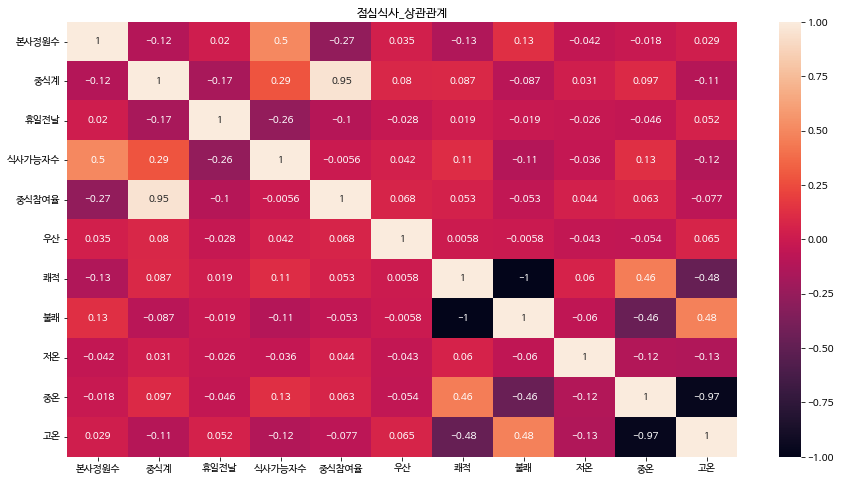

In [ ]:
plt.figure(figsize=(15,8))
plt.title('점심식사_상관관계')
sns.heatmap(tl.corr(), annot=True)

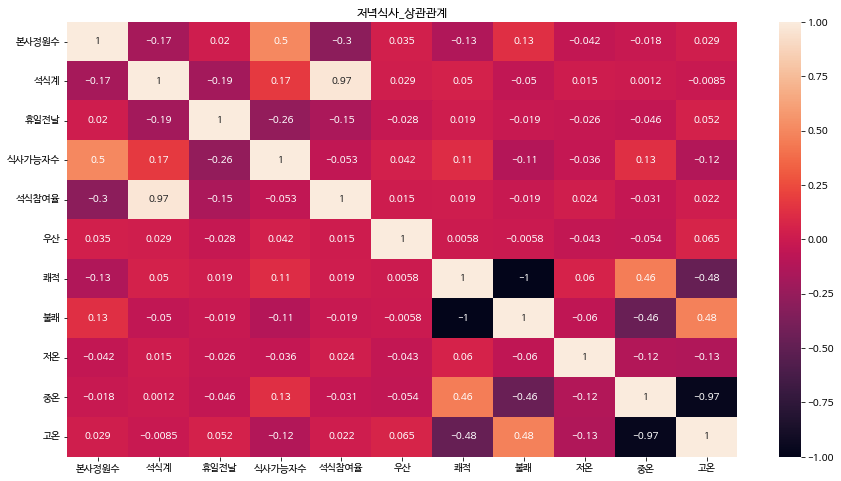

In [ ]:
plt.figure(figsize=(15,8))
plt.title('저녁식사_상관관계')
sns.heatmap(td.corr(), annot=True)

### 그래프

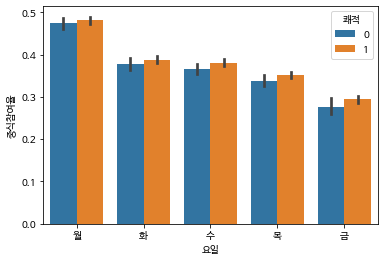

In [ ]:
sns.barplot(x='요일', y='중식참여율', data=tl, hue='쾌적')

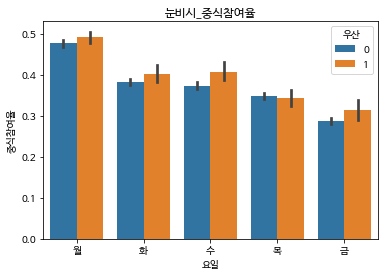

In [ ]:
plt.title('눈비시_중식참여율')
sns.barplot(x='요일', y='중식참여율', data=tl, hue='우산')

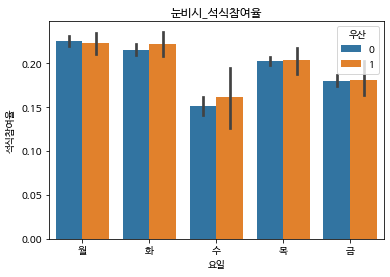

In [ ]:
plt.title('눈비시_석식참여율')
sns.barplot(x='요일', y='석식참여율', data=td, hue='우산')

## 코로나 확진자 데이터 join

In [ ]:
coro = pd.read_csv(filepath+'corona.csv')

In [ ]:
coro.tail()

,일자,코로나신규확진자
402,2021-04-05,2
403,2021-04-06,4
404,2021-04-07,0
405,2021-04-08,2
406,2021-04-09,0


In [ ]:
tl.tail()

,일자,요일,본사정원수,중식계,휴일전날,식사가능자수,중식참여율,우산,쾌적,불쾌,저온,중온,고온
1200,2021-01-20,수,2983,1093.0,False,2319.0,0.471324,0,1,0,0,1,0
1201,2021-01-21,목,2983,832.0,False,2309.0,0.360329,0,1,0,0,1,0
1202,2021-01-22,금,2983,579.0,False,2177.0,0.265962,0,1,0,0,1,0
1203,2021-01-25,월,2983,1145.0,False,2396.0,0.477880,0,1,0,0,1,0
1204,2021-01-26,화,2983,1015.0,False,2369.0,0.428451,1,1,0,0,1,0


In [ ]:
tl_corona = pd.merge(tl, coro, how='outer')
td_corona = pd.merge(td, coro, how='outer')

In [ ]:
tl_corona.head()

,일자,요일,본사정원수,중식계,휴일전날,식사가능자수,중식참여율,우산,쾌적,불쾌,저온,중온,고온,코로나신규확진자
0,2016-02-01,월,2601.0,1039.0,False,2401.0,0.432736,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,2016-02-02,화,2601.0,867.0,False,2378.0,0.364592,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,2016-02-03,수,2601.0,1017.0,False,2365.0,0.430021,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,2016-02-04,목,2601.0,978.0,False,2277.0,0.429513,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,2016-02-05,금,2601.0,925.0,True,2142.0,0.431839,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
tl_corona['코로나신규확진자'] = tl_corona['코로나신규확진자'].fillna(0)
td_corona['코로나신규확진자'] = td_corona['코로나신규확진자'].fillna(0)

In [ ]:
td_corona.tail()

,일자,요일,본사정원수,석식계,휴일전날,식사가능자수,석식참여율,우산,쾌적,불쾌,저온,중온,고온,코로나신규확진자
1397,2021-04-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
1398,2021-04-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
1399,2021-04-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1400,2021-04-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
1401,2021-04-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


### lunch.csv

- 일자 : 연-월-일 (2016-02-01 ~ 2021-04-09)
- 체감온도 : 해당 일자의 11~13시 평균 체감온도
- 불쾌지수 : 75미만 쾌적, 75이상 불쾌
- 우산 : 해당 일자의 외출시 우산필요여부

### dinner.csv

- 일자 : 연-월-일 (2016-02-01 ~ 2021-04-09)
- 체감온도 : 해당 일자의 17~19시 평균 체감온도
- 불쾌지수 : 75미만 쾌적, 75이상 불쾌
- 우산 : 해당 일자의 외출시 우산필요여부